### Korean Stock Market

In [1]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import pandas as pd

import pandas_datareader as pdr

In [2]:
start_date = '2000-01-01'
end_date = '2023-10-01'

kospi = pdr.DataReader("KOSPI", "naver", start_date, end_date).astype(float)

In [3]:
kospi = kospi.resample('M').last().iloc[:,3]

In [4]:
from utils import *
kospi_trend = trend_labeling(kospi.index, kospi, span = [1, 5, 1])

/Users/junghunlee/Desktop/Pycharm/EconomicCycle/Notes/utils.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df0 = pd.Series()
/Users/junghunlee/Desktop/Pycharm/EconomicCycle/Notes/utils.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df0 = pd.Series()
/Users/junghunlee/Desktop/Pycharm/EconomicCycle/Notes/utils.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df0 = pd.Series()
/Users/junghunlee/Desktop/Pycharm/EconomicCycle/Notes/utils.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df0 = pd.Series()
/Users/j

In [5]:
kospi_trend

,t1,tVal,bin
Date,,,
2000-01-31,2000-04-30,-2.75865,-1.0
2000-02-29,2000-05-31,-1.904778,-1.0
2000-03-31,2000-06-30,-1.573771,-1.0
2000-04-30,2000-07-31,2.003409,1.0
2000-05-31,2000-08-31,-0.899491,-1.0
...,...,...,...
2023-02-28,2023-05-31,7.793626,1.0
2023-03-31,2023-06-30,3.410358,1.0
2023-04-30,2023-07-31,3.15723,1.0


In [6]:
kospi_trend['scale'] = kospi_trend['tVal']

In [7]:
kospi_trend.loc[kospi_trend['scale'] > 10, 'scale'] = 10
kospi_trend.loc[kospi_trend['scale'] < -10, 'scale'] = -10

Text(0.5, 1.0, 'Labeling with Trend Serching')

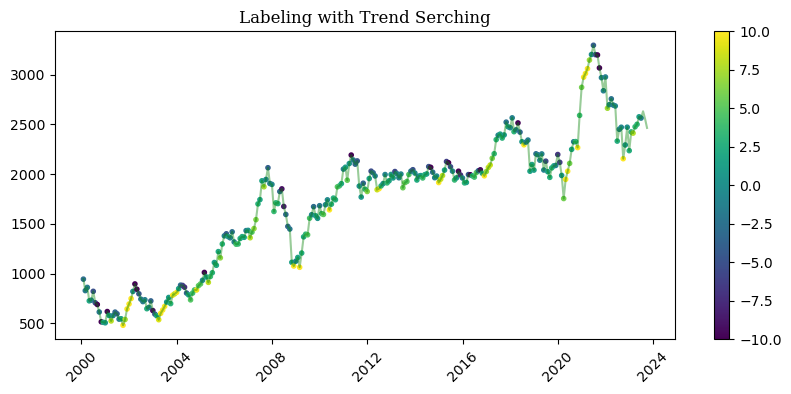

In [8]:
plt.figure(figsize = (10, 4))

plt.scatter(kospi_trend.index, kospi.loc[kospi_trend.index].values, c = kospi_trend['scale'], cmap = 'viridis', marker = '.')
plt.plot(kospi, color = 'green', alpha = 0.4)
plt.xticks(rotation=45)
plt.grid(False)
plt.colorbar()
plt.title('Labeling with Trend Serching', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Labeling with Trend Serching')

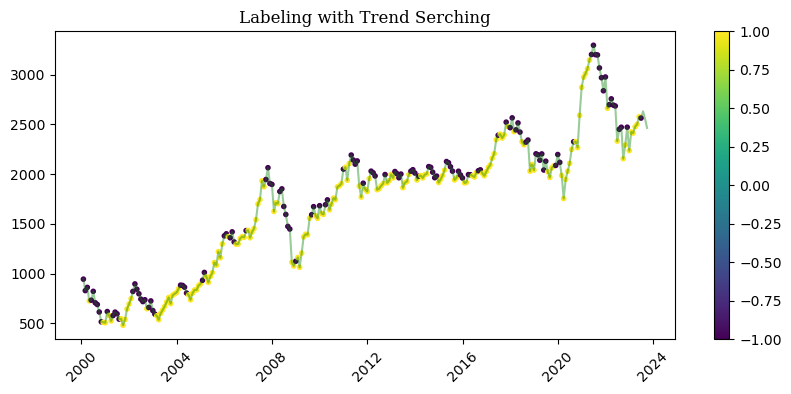

In [9]:
plt.figure(figsize = (10, 4))

plt.scatter(kospi_trend.index, kospi.loc[kospi_trend.index].values, c = kospi_trend['bin'], cmap = 'viridis', marker = '.')
plt.plot(kospi, color = 'green', alpha = 0.4)
plt.xticks(rotation=45)
plt.grid(False)
plt.colorbar()
plt.title('Labeling with Trend Serching', fontsize = 12, fontfamily = 'Serif')

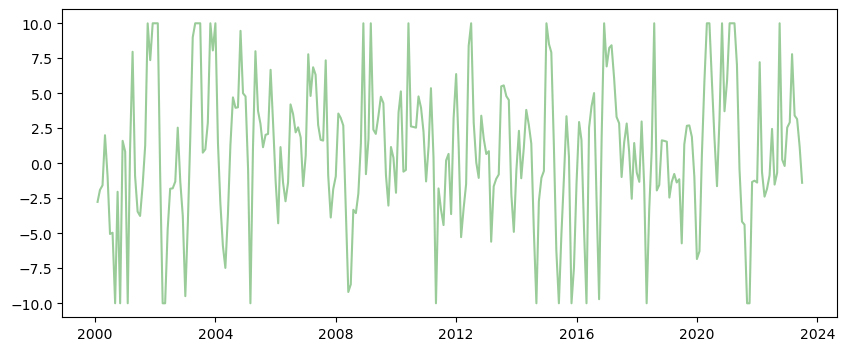

In [10]:
plt.figure(figsize = (10, 4))
plt.plot(kospi_trend['scale'], color = 'green', alpha = 0.4)
plt.grid(False)

In [11]:
kospi

Date
2000-01-31     943.88
2000-02-29     828.38
2000-03-31     860.94
2000-04-30     725.39
2000-05-31     731.88
               ...   
2023-05-31    2577.12
2023-06-30    2564.28
2023-07-31    2632.58
2023-08-31    2556.27
2023-09-30    2465.07
Freq: M, Name: Close, Length: 285, dtype: float64

#### Structual Change

In [12]:
sadf = get_bSADF_test_statistics(np.log(kospi), minSL = 10, constant = 'ct', lags = 1)

Text(0.5, 1.0, 'Supremum Augmented Dickey Fuller stats')

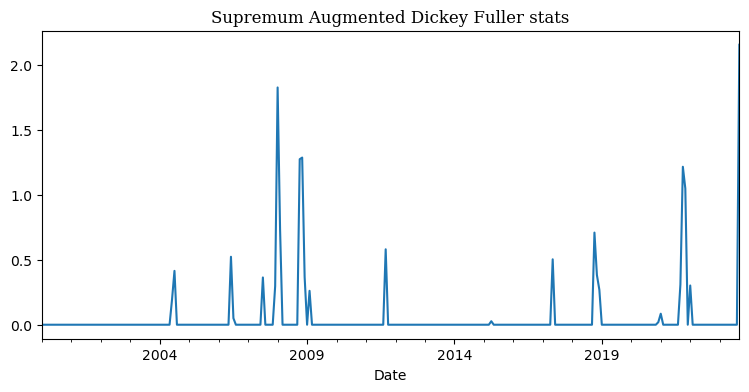

In [13]:
sadf.plot(figsize = (9, 4))
plt.title('Supremum Augmented Dickey Fuller stats', fontsize = 12, fontfamily = 'Serif')

#### Volatility

In [14]:
import arch
ret = np.log(kospi / kospi.shift()).dropna()
garch_model = arch.arch_model(ret, vol = 'GARCH', p = 1, q = 1)
result = garch_model.fit()
print(result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 34026762069476.72
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2485474.847865795
Iteration:      3,   Func. Count:     26,   Neg. LLF: -283.09141029561516
Iteration:      4,   Func. Count:     34,   Neg. LLF: 29907723959.2752
Iteration:      5,   Func. Count:     43,   Neg. LLF: 23479.062994959026
Iteration:      6,   Func. Count:     51,   Neg. LLF: 6517.838397210695
Iteration:      7,   Func. Count:     59,   Neg. LLF: 15105.162862101159
Iteration:      8,   Func. Count:     70,   Neg. LLF: -331.9074081279374
Iteration:      9,   Func. Count:     76,   Neg. LLF: 4515308.360542388
Iteration:     10,   Func. Count:     86,   Neg. LLF: 10.984537791085472
Iteration:     11,   Func. Count:     94,   Neg. LLF: -385.46651043932025
Iteration:     12,   Func. Count:    101,   Neg. LLF: -416.9799795232627
Optimization terminated successfully    (Exit mode 0)
            Current function value: -416.9799796675985
            Iterati

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003823. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Text(0.5, 1.0, 'Conditional Heteroscedasticity')

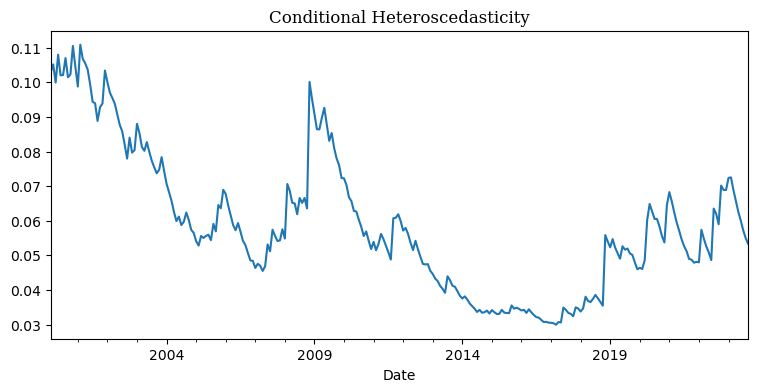

In [15]:
result.conditional_volatility.plot(figsize = (9, 4))
plt.title('Conditional Heteroscedasticity', fontsize = 12, fontfamily = 'Serif')

#### Volume

In [16]:
kospi_vol = pdr.DataReader("KOSPI", "naver", start_date, end_date).astype(float)
kospi_vol

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,1028.33,1066.18,1016.59,1059.04,195898.0
2000-01-05,1006.87,1026.52,984.05,986.31,257696.0
2000-01-06,1013.95,1014.90,953.50,960.79,203523.0
2000-01-07,949.17,970.16,930.84,948.65,215664.0
2000-01-10,979.67,994.94,974.82,987.24,240175.0
...,...,...,...,...,...
2023-09-21,2544.81,2549.63,2514.96,2514.97,394676.0
2023-09-22,2491.45,2513.26,2486.14,2508.13,433184.0
2023-09-25,2504.10,2509.38,2486.44,2495.76,438615.0


In [17]:
kospi_vol['Next_Day_Return'] = kospi_vol['Close'].shift(-1) / kospi_vol['Close'] - 1
kospi_vol['Buy_Dominated_Volume'] = kospi_vol['Volume'] * (kospi_vol['Next_Day_Return'] > 0)
kospi_vol['Sell_Dominated_Volume'] = kospi_vol['Volume'] * (kospi_vol['Next_Day_Return'] < 0)

monthly_buy_dominated_volume = kospi_vol['Buy_Dominated_Volume'].resample('M').sum()
monthly_sell_dominated_volume = kospi_vol['Sell_Dominated_Volume'].resample('M').sum()

In [18]:
monthly_buy_dominated_volume

Date
2000-01-31    1800676.0
2000-02-29    2324241.0
2000-03-31    3205968.0
2000-04-30    1659739.0
2000-05-31    2339394.0
                ...    
2023-05-31    6574923.0
2023-06-30    5815099.0
2023-07-31    6721123.0
2023-08-31    4118340.0
2023-09-30    2609559.0
Freq: M, Name: Buy_Dominated_Volume, Length: 285, dtype: float64

In [19]:
monthly_sell_dominated_volume

Date
2000-01-31    2997703.0
2000-02-29    2820404.0
2000-03-31    3330491.0
2000-04-30    2453778.0
2000-05-31    2667019.0
                ...    
2023-05-31    7258279.0
2023-06-30    6707573.0
2023-07-31    5322602.0
2023-08-31    8170225.0
2023-09-30    4835692.0
Freq: M, Name: Sell_Dominated_Volume, Length: 285, dtype: float64

In [20]:
buy_volume_weight = monthly_buy_dominated_volume / (monthly_buy_dominated_volume + monthly_sell_dominated_volume)
buy_volume_weight

Date
2000-01-31    0.375268
2000-02-29    0.451779
2000-03-31    0.490475
2000-04-30    0.403484
2000-05-31    0.467279
                ...   
2023-05-31    0.475300
2023-06-30    0.464366
2023-07-31    0.558060
2023-08-31    0.335136
2023-09-30    0.350500
Freq: M, Length: 285, dtype: float64

<Axes: xlabel='Date'>

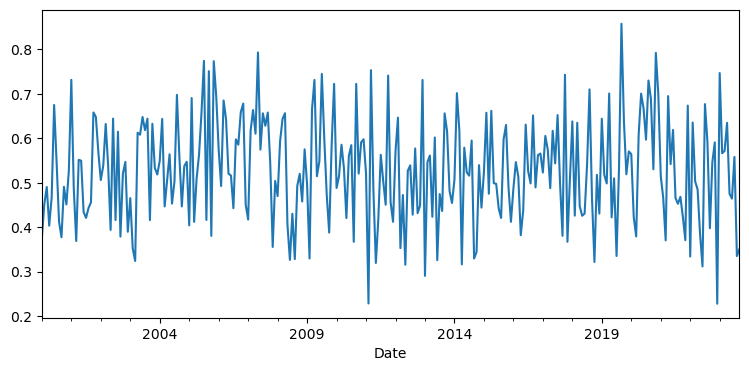

In [21]:
buy_volume_weight.plot(figsize = (9, 4))

#### Stock Matrix

In [22]:
stock_matrix = pd.concat([ret, result.conditional_volatility, sadf, buy_volume_weight, kospi_trend['tVal'], kospi_trend['bin']], axis = 1)
stock_matrix.columns = ['return','volatility','SADF','buyRate','trend','label']
stock_matrix = stock_matrix.dropna()

In [23]:
stock_matrix

,return,volatility,SADF,buyRate,trend,label
Date,,,,,,
2000-02-29,-0.130527,0.102926,0.0,0.451779,-1.904778,-1.0
2000-03-31,0.038553,0.105192,0.0,0.490475,-1.573771,-1.0
2000-04-30,-0.171315,0.099956,0.0,0.403484,2.003409,1.0
2000-05-31,0.008907,0.107983,0.0,0.467279,-0.899491,-1.0
2000-06-30,0.115174,0.102024,0.0,0.674801,-5.049803,-1.0
...,...,...,...,...,...,...
2023-02-28,-0.005056,0.072525,0.0,0.566307,7.793626,1.0
2023-03-31,0.026183,0.068847,0.0,0.571869,3.410358,1.0
2023-04-30,0.009911,0.065733,0.0,0.634709,3.15723,1.0


#### Random Forest Classifier

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [56]:
X = stock_matrix.iloc[:,:-2]
y = stock_matrix['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

rf = RandomForestClassifier(n_estimators = 1000, 
                            criterion = "entropy", 
                            bootstrap = True, n_jobs=1, 
                            random_state = 42, 
                            class_weight = 'balanced_subsample', 
                            oob_score = False)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=1000, n_jobs=1, random_state=42)

              precision    recall  f1-score   support

        down       0.54      0.27      0.36        26
          up       0.57      0.81      0.67        31

    accuracy                           0.56        57
   macro avg       0.55      0.54      0.51        57
weighted avg       0.55      0.56      0.53        57


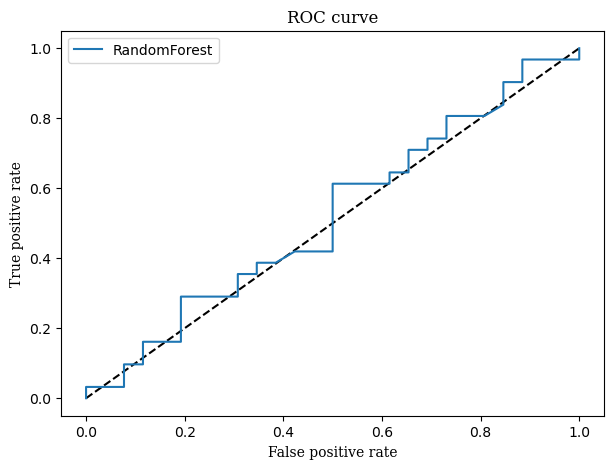

In [60]:
fit = rf.fit(X_train, y_train)
y_pred_rf = fit.predict_proba(X_test)[:, 1]
y_pred = fit.predict(X_test)
fpr_bc, tpr_bc, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred, target_names = ['down','up']))

plt.figure(figsize = (7,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_bc, tpr_bc, label = 'RandomForest')
plt.grid(False)
plt.xlabel('False positive rate', fontfamily = 'Serif')
plt.ylabel('True positive rate', fontfamily = 'Serif')
plt.title('ROC curve', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = 'best')
plt.show()

#### feature Importance

In [53]:
def feature_importances(X, cont, method, allow_masking_effects = False, n_splits = 10):
    max_features = None if allow_masking_effects else 1
    clf = DecisionTreeClassifier(
        criterion = 'entropy', max_features=max_features, class_weight='balanced', min_weight_fraction_leaf=0.0
    )
    clf = BaggingClassifier(
        base_estimator = clf, n_estimators=1000, max_features=1.0, max_samples=1.0, oob_score=True, n_jobs=-1
    )
    fit = clf.fit(X, cont['bin'])
    oob_score = fit.oob_score_

    cv_gen = PurgedKFold(n_splits=n_splits, samples_info_sets=cont['t1'])
    oos_score = ml_cross_val_score(clf, X, cont['bin'], cv_gen=cv_gen, scoring=accuracy_score).mean()

    if method == 'MDI':
        imp = mean_decrease_impurity(fit, X.columns)
    elif method == 'MDA':
        imp = mean_decrease_accuracy(clf, X, cont['bin'], cv_gen, scoring=accuracy_score)
    elif method == 'SFI':
        imp = single_feature_importance(clf, X, cont['bin'], cv_gen, scoring=accuracy_score)
    
    return imp, oob_score, oos_score


def test_data_func(X, cont, run='', allow_masking_effects=False, methods=['MDI', 'MDA', 'SFI']):
    for method in methods:
        feature_imp, oob_score, oos_score = feature_importances(X, cont, method, allow_masking_effects)
        plot_feature_importance(
            feature_imp, oob_score=oob_score, oos_score=oos_score,
            save_fig = False
        )

In [54]:
X_train

,return,volatility,SADF,buyRate
Date,,,,
2000-02-29,-0.130527,0.102926,0.000000,0.451779
2000-03-31,0.038553,0.105192,0.000000,0.490475
2000-04-30,-0.171315,0.099956,0.000000,0.403484
2000-05-31,0.008907,0.107983,0.000000,0.467279
2000-06-30,0.115174,0.102024,0.000000,0.674801
...,...,...,...,...
2020-09-30,0.000739,0.058308,0.000000,0.688000
2020-10-31,-0.026439,0.055552,0.000000,0.530345
2020-11-30,0.133652,0.053721,0.000000,0.791955


In [55]:
kospi_trend[:224]

,t1,tVal,bin,scale
Date,,,,
2000-01-31,2000-04-30,-2.75865,-1.0,-2.75865
2000-02-29,2000-05-31,-1.904778,-1.0,-1.904778
2000-03-31,2000-06-30,-1.573771,-1.0,-1.573771
2000-04-30,2000-07-31,2.003409,1.0,2.003409
2000-05-31,2000-08-31,-0.899491,-1.0,-0.899491
...,...,...,...,...
2020-08-31,2020-11-30,-1.636658,-1.0,-1.636658
2020-09-30,2020-12-31,3.160079,1.0,3.160079
2020-10-31,2021-01-31,24.968546,1.0,10


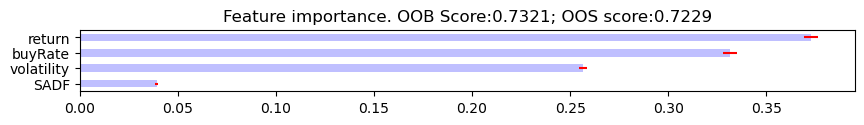

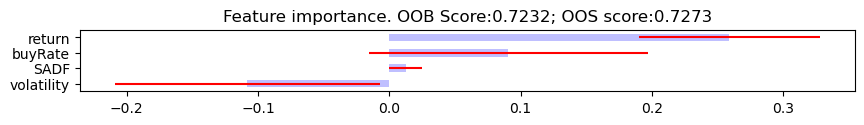

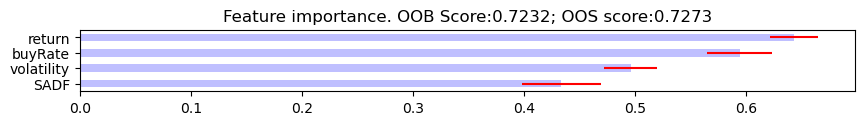

In [41]:
import warnings
warnings.filterwarnings('ignore')

test_data_func(X_train, kospi_trend[:224])

#### Predict Proba

Text(0.5, 1.0, 'Korean Stock Market')

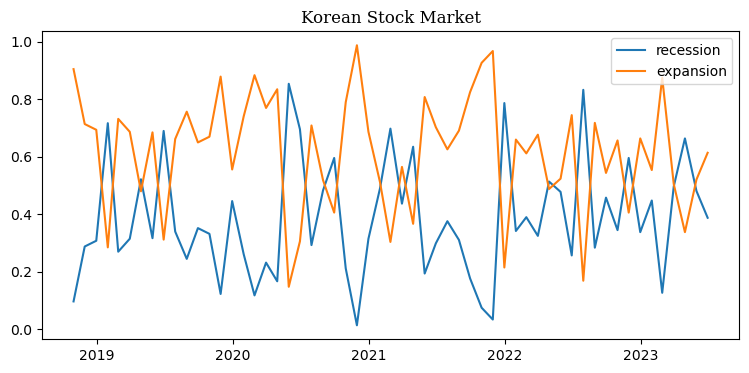

In [58]:
plt.figure(figsize = (9, 4))
plt.plot(X_test.index, rf.predict_proba(X_test))
plt.legend(['recession','expansion'])
plt.title('Korean Stock Market', fontsize = 12, fontfamily = 'Serif')